In [25]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('archive (1)/database.db')

query = '''
          SELECT
          *
          FROM Listings
          '''
df = pd.read_sql(query, conn)
df.head(5)

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,...,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,...,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزا...,أرض للبيع في طريق الملك عبدالله بن عبدالعزيز ا...,15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره...,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,...,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان...,"[""506610555_1417214243205.jpg"",""506610555_1417...",1671819056,2,0.0,...,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم...,"[""504121665_1418232181483.jpg"",""504121665_1418...",1672190424,15,0.0,...,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخ...,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف...,"[""567772202_1632148243568.png"",""000052346_1661...",1672253180,2,0.0,...,حي الثقبة,1060,NaN,NaN,None,1420232812,NaN,0.0,2023-01-01 14:38:46.004 +00:00,2023-01-01 14:38:46.004 +00:00


In [26]:
not_needed_columns = ['user_id', 'id', 'uri', 'title', 'content',
                      'imgs', 'refresh', 'last_update', 'path', 'user.review',
                      'user.img', 'user.name', 'user.phone', 'user.iam_verified',
                      'user.rega_id', 'native.logo', 'native.title', 'native.image',
                      'native.description', 'native.external_url', 'city', 'district', 'width', 'length',
                      'advertiser_type', 'create_time', 'has_extended_details', 'createdAt', 'updatedAt', 'city_id', 'district_id', 'daily_rentable']
ndf = df.drop(not_needed_columns, axis=1)
ndf.head(5)

,price,category,beds,livings,wc,area,type,street_width,age,street_direction,ketchen,ac,furnished,location.lat,location.lng,rent_period
0,1958400.0,2,0.0,0.0,0.0,816.0,2.0,60.0,0.0,4.0,0.0,0.0,0.0,24.548930,46.781390,0.0
1,15078000.0,2,0.0,0.0,0.0,1077.0,2.0,80.0,0.0,4.0,0.0,0.0,0.0,24.754130,46.724820,0.0
2,8057700.0,2,0.0,0.0,0.0,23022.0,3.0,15.0,0.0,3.0,0.0,0.0,0.0,18.268720,41.516460,0.0
3,50000.0,15,0.0,0.0,0.0,400.0,3.0,35.0,0.0,4.0,0.0,0.0,0.0,21.892200,39.126540,0.0
4,3000000.0,2,0.0,0.0,0.0,870.0,3.0,15.0,0.0,7.0,0.0,0.0,0.0,26.285235,50.180363,0.0


In [27]:
# Splitting real-estate for rental and for selling because it two different task

rental_categories = [1, 4, 5, 8, 11, 13, 14, 15, 16, 17, 18, 19, 23]
sell_categories = [2, 3, 6, 7, 9, 10, 12, 20, 21, 22]

In [28]:
sell_df = ndf[ndf['category'].isin(sell_categories)]
rental_df = ndf[ndf['category'].isin(rental_categories)]
print("Number of real-estate for sale:", sell_df.shape[0])
print("Number of real-estate for rent:", rental_df.shape[0])

Number of real-estate for sale: 525516
Number of real-estate for rent: 138430


# Real-estate for sale

In [29]:
sell_df = sell_df.drop(['rent_period'], axis=1)
sell_df.isnull().sum()

price                    0
category                 0
beds                224913
livings             224573
wc                  226567
area                    27
type                370271
street_width         13705
age                 225654
street_direction      5987
ketchen             244131
ac                  522101
furnished           216162
location.lat             0
location.lng             0
dtype: int64

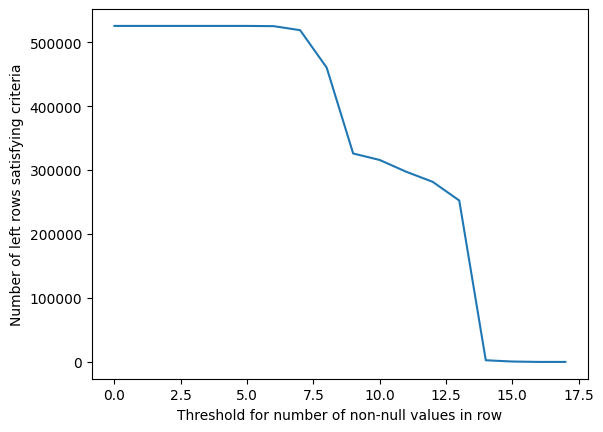

In [30]:
import matplotlib.pyplot as plt

n_rows = []
for i in range(18):
    clean_df = sell_df.dropna(thresh=i)
    n_rows.append(clean_df.shape[0])

plt.plot(list(range(18)), n_rows)
plt.xlabel('Threshold for number of non-null values in row')
plt.ylabel('Number of left rows satisfying criteria')

plt.show()


In [31]:
clean_df = sell_df.dropna(thresh=13)
clean_df.shape[0]

252450

In [32]:
null_counts = clean_df.isnull().sum()
print(null_counts)

price                    0
category                 0
beds                     0
livings                  0
wc                       5
area                     0
type                250383
street_width             4
age                     94
street_direction        60
ketchen                 34
ac                  251093
furnished               17
location.lat             0
location.lng             0
dtype: int64


In [39]:
not_needed_columns = ['type', 'ac']
new_clean_df = clean_df.drop(not_needed_columns, axis=1)
new_clean_df.head(5)

,price,category,beds,livings,wc,area,street_width,age,street_direction,ketchen,furnished,location.lat,location.lng
0,1958400.0,2,0.0,0.0,0.0,816.0,60.0,0.0,4.0,0.0,0.0,24.548930,46.781390
1,15078000.0,2,0.0,0.0,0.0,1077.0,80.0,0.0,4.0,0.0,0.0,24.754130,46.724820
2,8057700.0,2,0.0,0.0,0.0,23022.0,15.0,0.0,3.0,0.0,0.0,18.268720,41.516460
4,3000000.0,2,0.0,0.0,0.0,870.0,15.0,0.0,7.0,0.0,0.0,26.285235,50.180363
5,1050000.0,2,0.0,0.0,0.0,875.0,30.0,0.0,4.0,0.0,0.0,24.560830,46.795360


In [40]:
new_null_counts = new_clean_df.isnull().sum()
print(new_null_counts)

price                0
category             0
beds                 0
livings              0
wc                   5
area                 0
street_width         4
age                 94
street_direction    60
ketchen             34
furnished           17
location.lat         0
location.lng         0
dtype: int64


In [41]:
new_clean_df = new_clean_df.dropna()
new_clean_df.head()

,price,category,beds,livings,wc,area,street_width,age,street_direction,ketchen,furnished,location.lat,location.lng
0,1958400.0,2,0.0,0.0,0.0,816.0,60.0,0.0,4.0,0.0,0.0,24.548930,46.781390
1,15078000.0,2,0.0,0.0,0.0,1077.0,80.0,0.0,4.0,0.0,0.0,24.754130,46.724820
2,8057700.0,2,0.0,0.0,0.0,23022.0,15.0,0.0,3.0,0.0,0.0,18.268720,41.516460
4,3000000.0,2,0.0,0.0,0.0,870.0,15.0,0.0,7.0,0.0,0.0,26.285235,50.180363
5,1050000.0,2,0.0,0.0,0.0,875.0,30.0,0.0,4.0,0.0,0.0,24.560830,46.795360


In [42]:
def one_hot_encoding(column, df):
    one_hot_encoded_df = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, one_hot_encoded_df], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [43]:
column_to_one_hot_encode = ['category', 'street_direction']
for column in column_to_one_hot_encode:
    new_clean_df = one_hot_encoding(column, new_clean_df)

In [44]:
new_clean_df.to_csv('prepared_dataset_sale_estate.csv')

# Real-estate for rent

In [45]:
rental_df.head()

,price,category,beds,livings,wc,area,type,street_width,age,street_direction,ketchen,ac,furnished,location.lat,location.lng,rent_period
3,50000.0,15,0.0,0.0,0.0,400.0,3.0,35.0,0.0,4.0,0.0,0.0,0.0,21.892200,39.126540,0.0
6,350000.0,16,0.0,0.0,0.0,780.0,3.0,40.0,3.0,3.0,0.0,0.0,0.0,26.355790,50.036730,0.0
14,800000.0,15,0.0,0.0,0.0,2400.0,2.0,60.0,0.0,3.0,0.0,0.0,0.0,26.225629,50.214515,0.0
17,50000.0,8,0.0,0.0,0.0,130.0,0.0,50.0,0.0,4.0,0.0,0.0,0.0,18.198070,42.556930,0.0
33,76000.0,8,0.0,0.0,0.0,150.0,0.0,40.0,6.0,3.0,0.0,0.0,0.0,24.588432,46.760539,0.0


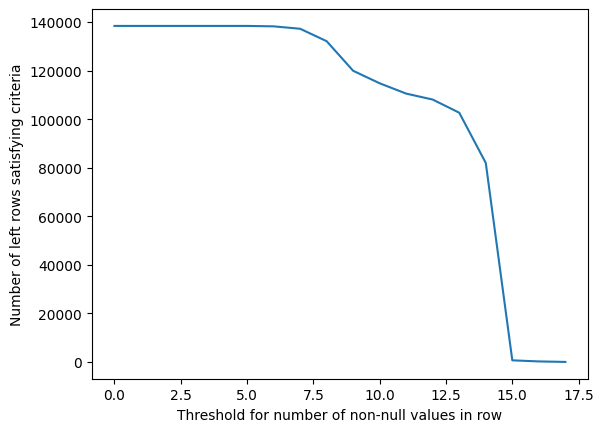

In [46]:
import matplotlib.pyplot as plt

n_rows = []
for i in range(18):
    clean_df = rental_df.dropna(thresh=i)
    n_rows.append(clean_df.shape[0])

plt.plot(list(range(18)), n_rows)
plt.xlabel('Threshold for number of non-null values in row')
plt.ylabel('Number of left rows satisfying criteria')

plt.show()


In [47]:
clean_df = rental_df.dropna(thresh=14)
clean_df.shape[0]

81966

In [48]:
null_counts = clean_df.isnull().sum()
print(null_counts)

price                   0
category                0
beds                    0
livings                 0
wc                      2
area                    0
type                81696
street_width          191
age                    64
street_direction    67958
ketchen                11
ac                     27
furnished               7
location.lat            0
location.lng            0
rent_period         13117
dtype: int64


In [49]:
not_needed_columns = ['type', 'street_direction']
new_clean_df = clean_df.drop(not_needed_columns, axis=1)
new_clean_df.head(5)

,price,category,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,location.lat,location.lng,rent_period
3,50000.0,15,0.0,0.0,0.0,400.0,35.0,0.0,0.0,0.0,0.0,21.892200,39.126540,0.0
6,350000.0,16,0.0,0.0,0.0,780.0,40.0,3.0,0.0,0.0,0.0,26.355790,50.036730,0.0
14,800000.0,15,0.0,0.0,0.0,2400.0,60.0,0.0,0.0,0.0,0.0,26.225629,50.214515,0.0
17,50000.0,8,0.0,0.0,0.0,130.0,50.0,0.0,0.0,0.0,0.0,18.198070,42.556930,0.0
33,76000.0,8,0.0,0.0,0.0,150.0,40.0,6.0,0.0,0.0,0.0,24.588432,46.760539,0.0


In [50]:
new_clean_df = new_clean_df.dropna()
print(len(new_clean_df))

68579


In [51]:
column_to_one_hot_encode = ['category', 'rent_period']
for column in column_to_one_hot_encode:
    new_clean_df = one_hot_encoding(column, new_clean_df)

In [52]:
new_clean_df.head()

,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,...,category_14,category_15,category_16,category_17,category_19,category_23,rent_period_0.0,rent_period_1.0,rent_period_2.0,rent_period_3.0
3,50000.0,0.0,0.0,0.0,400.0,35.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
6,350000.0,0.0,0.0,0.0,780.0,40.0,3.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
14,800000.0,0.0,0.0,0.0,2400.0,60.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
17,50000.0,0.0,0.0,0.0,130.0,50.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
33,76000.0,0.0,0.0,0.0,150.0,40.0,6.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False


In [53]:
new_clean_df.to_csv('prepared_dataset_rent_estate.csv')